In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

#scaling and train-test split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_val_predict, learning_curve

#models to review
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest

#crossvalidation methods

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV

#metrics to review
from sklearn.metrics import (make_scorer, recall_score, precision_score,
f1_score, roc_auc_score, accuracy_score, precision_recall_curve, average_precision_score,
                             auc, roc_curve, classification_report, confusion_matrix)

#dealing with SMOTE techniques
import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split, RandomizedSearchCV

#import helper file py
import nbimporter
from dataclean import *

#autoreload python file
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
#neatness
%matplotlib inline

import datetime
import itertools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
#import csv data 
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data cleaning and inital EDA

In [213]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [214]:
#df.info()

In [215]:
#reorder columns
column_names = ['Class', 'Amount','Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

df = df.reindex(columns=column_names)
df.columns

Index(['Class', 'Amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28'],
      dtype='object')

In [216]:
# number of fraud cases to equalize subsample proportions
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [217]:
#assess Target column's balance
n = "\n"
normal_percent = df['Class'].value_counts()[0] / len(df)
fraud_percent = df['Class'].value_counts()[1] / len(df)
print(f"Percentage of instances of normal transactions: \
{normal_percent}\n{n}Percentages of instances of fraud transactions: {fraud_percent}")

Percentage of instances of normal transactions: 0.9982725143693799

Percentages of instances of fraud transactions: 0.001727485630620034


Text(0.5, 1, 'Class Distributions \n (0: Normal transaction|| 1: Fraud)')

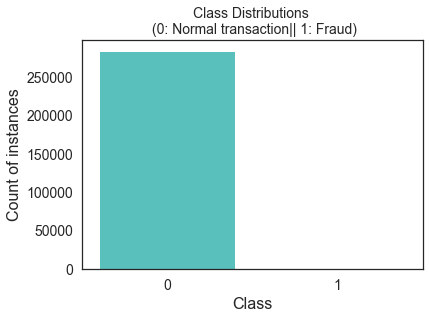

In [218]:
colors = ["mediumturquoise", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.yticks([0, 50000, 100000, 150000, 200000, 250000], fontsize=14)
plt.xticks([0, 1], fontsize=14)
plt.tight_layout()
plt.ylabel('Count of instances', fontsize= 16)
plt.xlabel('Class', fontsize= 16)
plt.title('Class Distributions \n (0: Normal transaction|| 1: Fraud)', fontsize=14)

In [219]:
#scale the last two columns that need to be modified
std_scaler = StandardScaler()

df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [220]:
#create under-sampled dataframe balanced
df = df.sample(frac=1)

fraud_under = df[df['Class'] == 1]
nonfraud_under = df[df['Class'] == 0][:492]

df_under = pd.concat([fraud_under, nonfraud_under])

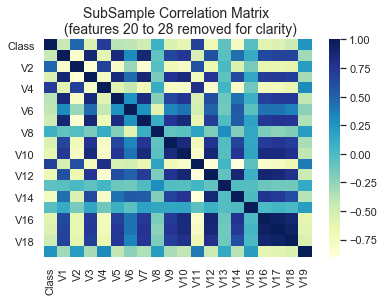

In [221]:
#correlation heatmap on subsample
df_corr = df_under.iloc[:,:20]
under_corr = df_corr.corr()

sns.heatmap(under_corr, cmap='YlGnBu')
plt.title('SubSample Correlation Matrix \n (features 20 to 28 removed for clarity)', fontsize=14);
# plt.savefig('subsample_heatmap')

In [222]:
#prep matricies of features for plotting

feature_v14 = df_under['V14'].loc[df_under['Class'] == 1].values
feature_v8 = df_under['V8'].loc[df_under['Class'] == 1].values
feature_v20 = df_under['V20'].loc[df_under['Class'] == 1].values

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence f

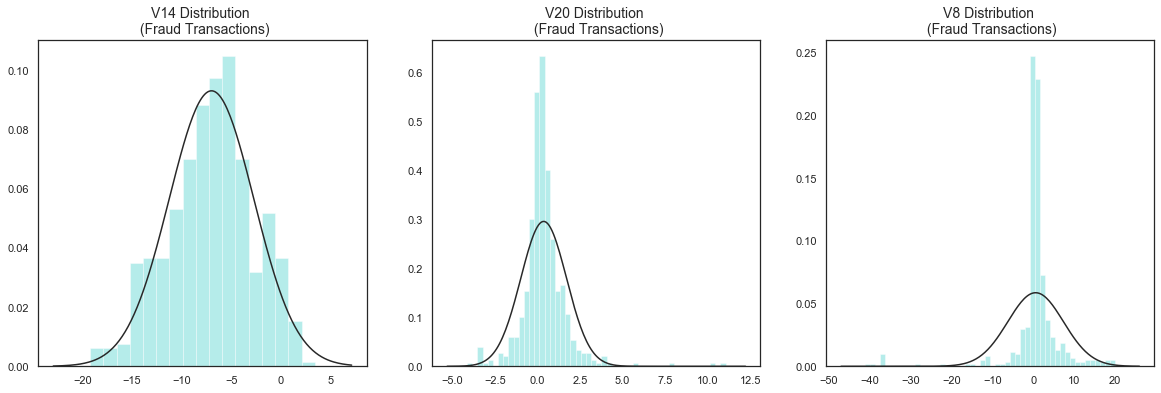

In [223]:
# distributions of specific features
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

sns.distplot(feature_v14, ax=ax1, fit= norm, kde=False, color='mediumturquoise')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

sns.distplot(feature_v20, ax=ax2, fit= norm, kde=False, color='mediumturquoise')
ax2.set_title('V20 Distribution \n (Fraud Transactions)', fontsize=14)

sns.distplot(feature_v8, ax=ax3, fit= norm, kde=False, color='mediumturquoise')
ax3.set_title('V8 Distribution \n (Fraud Transactions)', fontsize=14);

In [224]:
df_under.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
191359,1,1.177824,2.487103,-5.330608,5.324547,1.150243,-1.281843,-1.171994,0.413778,-2.659840,...,0.262325,-0.431790,-0.092088,0.145216,0.457788,0.167739,0.451243,0.268421,-0.333759,0.724564
46918,1,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,2.237530,-1.091345
108258,1,0.196707,1.189757,0.704882,2.891388,0.045555,1.245730,-1.198714,-2.421616,-1.232089,...,-1.328132,0.189311,-0.005524,-0.814708,0.400924,0.286281,0.135215,0.257315,-0.350191,-0.505092
79536,1,-0.264869,3.386140,-3.454997,4.367629,3.336060,-2.053918,0.256890,-2.957235,-2.855797,...,-1.394504,-0.166029,-1.452081,-0.251815,1.243461,0.452787,0.132218,0.424599,-0.349231,-0.773813
189701,1,-4.599447,2.762540,-4.656530,5.201403,-2.470388,-0.357618,-3.767189,0.061466,-1.836200,...,1.581480,0.261333,0.621415,0.994110,-0.687853,-0.337531,-1.612791,1.231425,0.019992,0.709760


## Initial training on under sampled data

### Train on the following:
+ Logisitic Regression
+ K Neighbors Classifier
+ Decision Trees Classifier
+ Random Forest Classifier
+ Gradient Boosting Classifier


### using cross validation 5 folds

In [225]:
#establish X values as feature matrix and y as target array
X = df_under.drop('Class', axis = 1).values
y = df_under['Class'].values

# test train split for undersampling. DO NOT EVER TOUCH TEST ITEMS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
lr_model = LogisticRegression().fit(X_train, y_train)

lr_train_score = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_train_score.mean()

0.9325873392913625

In [227]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

dt_train_score = cross_val_score(dt_model, X_train, y_train, cv=5)
dt_train_score.mean()


0.8932256877471746

In [228]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

knn_train_score = cross_val_score(knn_model, X_train, y_train, cv=5)
knn_train_score.mean()

0.9326036711548282

In [229]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

rf_train_score = cross_val_score(rf_model, X_train, y_train, cv=5)
rf_train_score.mean()

0.9312971220775784

In [230]:
gb_model = GradientBoostingClassifier().fit(X_train, y_train)

gb_train_score = cross_val_score(rf_model, X_train, y_train, cv=5)
gb_train_score.mean()

0.929990883099002

### move this helper function to PY file

In [231]:
class_models = {'gbc': GradientBoostingClassifier(),'rf': RandomForestClassifier(),'knn': KNeighborsClassifier(),
                'dt': DecisionTreeClassifier(), 'lr': LogisticRegression()}

def cross_valid_score(class_models, X_train, y_train, cv=5):
    d = {}
    final = []
    for kind, model in class_models.items():
       
        model.fit(X_train, y_train)
        training_score = cross_val_score(model, X_train, y_train, cv=5)
        d[kind]= round(float(training_score.mean()),4)
    return d
    

In [232]:
cross_valid_score(class_models, X_train, y_train, cv=5)


{'gbc': 0.93, 'rf': 0.9326, 'knn': 0.9326, 'dt': 0.8933, 'lr': 0.9326}

### Let's try gridsearching for best parameters

In [233]:
#establish parameter dictionaries for GridSearch
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [7000]}

knn_params = {"n_neighbors": list(range(2,6,1)),
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

rf_params = {'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, None],
              'max_features': [1, 'sqrt', 'log2', None]}

dt_params = {'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, None],
              'max_features': [1, 'sqrt', 'log2', None]}

gbc_params = {'loss': ('deviance', 'exponential'), 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]}


#### KNN evaluation undersample gridsearch

In [234]:
#KNN scores gridsearch analysis on test data
gridsear_knn = GridSearchCV(KNeighborsClassifier(), knn_params)

gridsear_knn.fit(X_train, y_train)
# best parameters to be used
gridsear_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [235]:


knn_best = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_train)

knn_recall = recall_score(y_train, y_pred_knn)
knn_precision = precision_score(y_train, y_pred_knn)
knn_f1 = f1_score(y_train, y_pred_knn)
knn_accuracy = accuracy_score(y_train, y_pred_knn)
print(f'KNN recall score: {knn_recall}\nKNN precision score: {knn_precision} \
    \nKNN f1 score: {knn_f1}\nKNN accuracy score: {knn_accuracy}')



KNN recall score: 0.9134860050890585
KNN precision score: 0.9728997289972899     
KNN f1 score: 0.9422572178477691
KNN accuracy score: 0.9440914866581956


#### LogisticRegression evaluation undersample gridsearch

In [236]:
#LR scores gridsearch analysis on test data
gridsear_lr = GridSearchCV(LogisticRegression(), lr_params)

gridsear_lr.fit(X_train, y_train)
# best parameters to be used
gridsear_lr.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=7000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [237]:
#LR scores gridsearch analysis on test data
gridsear_lr = GridSearchCV(LogisticRegression(), lr_params)

gridsear_lr.fit(X_train, y_train)
# best parameters to be used
gridsear_lr.best_estimator_
lr_best = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=7000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

lr_best.fit(X_train, y_train)
y_pred_lr = lr_best.predict(X_train)

lr_recall = recall_score(y_train, y_pred_lr)
lr_precision = precision_score(y_train, y_pred_lr)
lr_f1 = f1_score(y_train, y_pred_lr)
lr_accuracy = accuracy_score(y_train, y_pred_lr)
print(f'LogisticRegression recall score: {lr_recall}\nLogisticRegression  precision score: {lr_precision} \
    \nLogisticRegression  f1 score: {lr_f1}\nLogisticRegression  accuracy score: {lr_accuracy}')

LogisticRegression recall score: 0.9211195928753181
LogisticRegression  precision score: 0.9783783783783784     
LogisticRegression  f1 score: 0.9488859764089123
LogisticRegression  accuracy score: 0.9504447268106735


#### DecisionTree evaluation undersample gridsearch

In [238]:
#DT scores gridsearch analysis on test data
gridsear_dt = GridSearchCV(DecisionTreeClassifier(), dt_params)

gridsear_dt.fit(X_train, y_train)
# best parameters to be used
gridsear_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [239]:
#DT scores gridsearch analysis on test data
gridsear_dt = GridSearchCV(DecisionTreeClassifier(), dt_params)

gridsear_dt.fit(X_train, y_train)
# best parameters to be used
gridsear_dt.best_estimator_
dt_best = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

dt_best.fit(X_train, y_train)
y_pred_dt = dt_best.predict(X_train)

dt_recall = recall_score(y_train, y_pred_dt)
dt_precision = precision_score(y_train, y_pred_dt)
dt_f1 = f1_score(y_train, y_pred_dt)
dt_accuracy = accuracy_score(y_train, y_pred_dt)
print(f'DecisionTree recall score: {dt_recall}\nDecisionTree  precision score: {dt_precision} \
    \nDecisionTree  f1 score: {dt_f1}\nDecisionTree  accuracy score: {dt_accuracy}')

DecisionTree recall score: 0.8600508905852418
DecisionTree  precision score: 0.9883040935672515     
DecisionTree  f1 score: 0.9197278911564625
DecisionTree  accuracy score: 0.9250317662007624


#### RandomForest evaluation undersample gridsearch

In [240]:
#RF scores gridsearch analysis on test data
gridsear_rf = GridSearchCV(RandomForestClassifier(), rf_params)

gridsear_rf.fit(X_train, y_train)
# best parameters to be used
gridsear_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [241]:
#RF scores gridsearch analysis on test data
gridsear_rf = GridSearchCV(RandomForestClassifier(), rf_params)

gridsear_rf.fit(X_train, y_train)
# best parameters to be used
gridsear_rf.best_estimator_
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_train)

rf_recall = recall_score(y_train, y_pred_rf)
rf_precision = precision_score(y_train, y_pred_rf)
rf_f1 = f1_score(y_train, y_pred_rf)
rf_accuracy = accuracy_score(y_train, y_pred_rf)
print(f'RandomForest recall score: {rf_recall}\nRandomForest  precision score: {rf_precision} \
    \nRandomForest  f1 score: {rf_f1}\nRandomForest  accuracy score: {rf_accuracy}')

RandomForest recall score: 0.989821882951654
RandomForest  precision score: 1.0     
RandomForest  f1 score: 0.9948849104859334
RandomForest  accuracy score: 0.9949174078780177


#### GradientBoosting evaluation undersample gridsearch

In [242]:
#GBC scores gridsearch analysis on test data
gridsear_gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params)

gridsear_gbc.fit(X_train, y_train)
# best parameters to be used
gridsear_gbc.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [243]:
#GBC scores gridsearch analysis on test data
gridsear_gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params)

gridsear_gbc.fit(X_train, y_train)
# best parameters to be used
gridsear_gbc.best_estimator_
gbc_best = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

gbc_best.fit(X_train, y_train)
y_pred_gbc = gbc_best.predict(X_train)

gbc_recall = recall_score(y_train, y_pred_gbc)
gbc_precision = precision_score(y_train, y_pred_gbc)
gbc_f1 = f1_score(y_train, y_pred_gbc)
gbc_accuracy = accuracy_score(y_train, y_pred_gbc)
print(f'GradientBoosting  recall score: {gbc_recall}\nGradientBoosting precision score: {gbc_precision} \
    \nGradientBoosting f1 score: {gbc_f1}\nGradientBoosting accuracy score: {gbc_accuracy}')

GradientBoosting  recall score: 0.9974554707379135
GradientBoosting precision score: 1.0     
GradientBoosting f1 score: 0.9987261146496815
GradientBoosting accuracy score: 0.9987293519695044


In [244]:
lr_yhat = cross_val_predict(lr_best, X_train, y_train, cv=5, method='predict_proba')

knn_yhat = cross_val_predict(knn_best, X_train, y_train, cv=5, method='predict_proba')

dt_yhat = cross_val_predict(dt_best, X_train, y_train, cv=5, method='predict_proba')

rf_yhat = cross_val_predict(rf_best, X_train, y_train, cv=5, method='predict_proba')

gbc_yhat = cross_val_predict(gbc_best, X_train, y_train, cv=5, method='predict_proba')


# lr_yhat = lr_best.predict(X_train)

# knn_yhat = knn_best.predict(X_train)

# dt_yhat = dt_best.predict(X_train)

# rf_yhat = rf_best.predict(X_train)

# gbc_yhat = gbc_best.predict(X_train)

In [245]:
lr_fpr, lr_tpr, lr_thresh = roc_curve(y_train, lr_yhat[:, 1])

knn_fpr, knn_tpr, knn_thresh = roc_curve(y_train, knn_yhat[:, 1])

dt_fpr, dt_tpr, dt_thresh = roc_curve(y_train, dt_yhat[:, 1])

rf_fpr, rf_tpr, rf_thresh = roc_curve(y_train, rf_yhat[:, 1])

gbc_fpr, gbc_tpr, gbc_thresh = roc_curve(y_train, gbc_yhat[:, 1])

In [246]:
# def roc_auc_score(y_train, y_hat):
    

# roc_auc_score(y_train, lr_yhat)
# roc_auc_score(y_train, knn_yhat)
# roc_auc_score(y_train, dt_yhat)

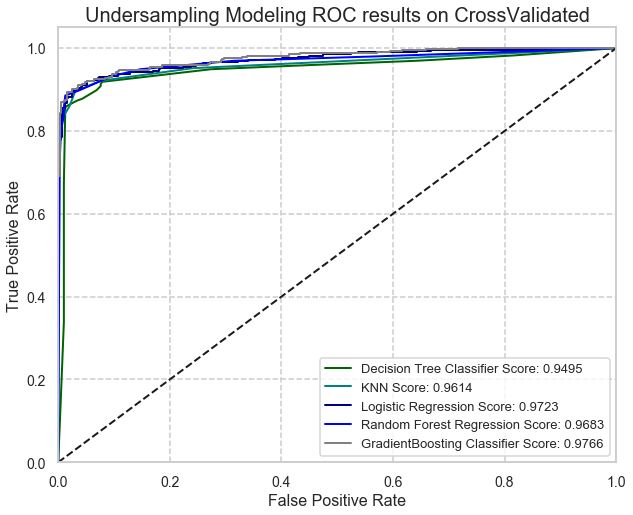

In [247]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1.5,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})


lw = 2
plt.figure(figsize=(10,8))
plt.plot(dt_fpr, dt_tpr, color = 'darkgreen', label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, dt_yhat[:, 1])))
plt.plot(knn_fpr, knn_tpr, color = 'teal', label='KNN Score: {:.4f}'.format(roc_auc_score(y_train, knn_yhat[:, 1])))
plt.plot(lr_fpr, lr_tpr, color = 'navy', label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(y_train, lr_yhat[:, 1])))
plt.plot(rf_fpr, rf_tpr, color = 'blue', label='Random Forest Regression Score: {:.4f}'.format(roc_auc_score(y_train, rf_yhat[:, 1])))
plt.plot(gbc_fpr, gbc_tpr, color = 'gray', label='GradientBoosting Classifier Score: {:.4f}'.format(roc_auc_score(y_train, gbc_yhat[:, 1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
plt.legend(prop={'size':13},loc='lower right')
plt.title('Undersampling Modeling ROC results on CrossValidated', fontsize=20)
plt.show()

# Done with undersampling - back to OG dataset

In [201]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [202]:


print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class'].values



No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [203]:
#Test train split standard 80 / 20
Xtrainfull, Xtestfull, ytrainfull, ytestfull = train_test_split(X, y, 
                                                    test_size=0.2, random_state=11)

## BASELINE MODEL - LR Performing Badly

In [204]:
#LR scores gridsearch analysis on FULL 
gridsear_lr = GridSearchCV(LogisticRegression(), lr_params)

gridsear_lr.fit(X_train, y_train)
# best parameters to be used
gridsear_lr.best_estimator_
gbc_best = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

lr_best.fit(X_train, y_train)
y_pred_lr = lr_best.predict(Xtrainfull)

lr_recall = recall_score(ytrainfull, y_pred_lr)
lr_precision = precision_score(ytrainfull, y_pred_lr)
lr_f1 = f1_score(ytrainfull, y_pred_lr)
lr_accuracy = accuracy_score(ytrainfull, y_pred_lr)
print(f'Logistic Regression recall score: {lr_recall}\nLogistic Regression  precision score: {lr_precision} \
    \nLogistic Regression f1 score: {lr_f1}\nLogistic Regression  accuracy score: {lr_accuracy}')

Logistic Regression recall score: 0.0026041666666666665
Logistic Regression  precision score: 0.012658227848101266     
Logistic Regression f1 score: 0.004319654427645789
Logistic Regression  accuracy score: 0.9979766946827887


In [205]:
lr_yhatfull = cross_val_predict(lr_best, Xtrainfull, ytrainfull, cv=5, method='predict_proba')

In [206]:
lr_fprfull, lr_tprfull, lr_threshfull = roc_curve(ytrainfull, lr_yhatfull[:, 1])

In [207]:
#GBC scores gridsearch analysis on test data
gridsear_gbc = GridSearchCV(GradientBoostingClassifier(), gbc_params)

gridsear_gbc.fit(X_train, y_train)
# best parameters to be used
gridsear_gbc.best_estimator_
gbc_best = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

gbc_best.fit(X_train, y_train)
y_pred_gbc = gbc_best.predict(Xtrainfull)

gbc_recall = recall_score(ytrainfull, y_pred_gbc)
gbc_precision = precision_score(ytrainfull, y_pred_gbc)
gbc_f1 = f1_score(ytrainfull, y_pred_gbc)
gbc_accuracy = accuracy_score(ytrainfull, y_pred_gbc)
print(f'GradientBoosting  recall score: {gbc_recall}\nGradientBoosting precision score: {gbc_precision} \
    \nGradientBoosting f1 score: {gbc_f1}\nGradientBoosting accuracy score: {gbc_accuracy}')

GradientBoosting  recall score: 0.7760416666666666
GradientBoosting precision score: 0.8418079096045198     
GradientBoosting f1 score: 0.8075880758807589
GradientBoosting accuracy score: 0.9993767692949154


In [208]:
gbc_yhatfull = cross_val_predict(gbc_best, Xtrainfull, ytrainfull, cv=5, method='predict_proba')

In [209]:
gbc_fprfull, gbc_tprfull, gbc_threshfull = roc_curve(ytrainfull, gbc_yhatfull[:, 1])

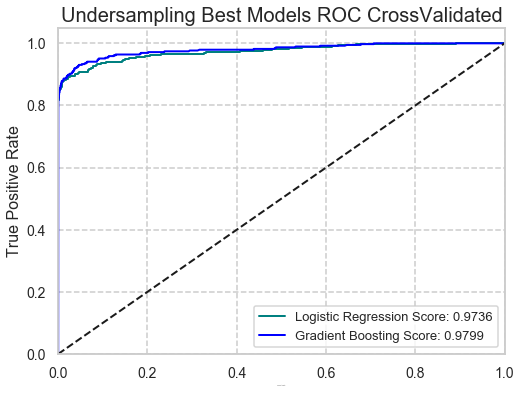

In [49]:
#plot baseline ROC curve on unbalanced OG dataset

import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1.5,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})


lw = 2
plt.figure(figsize=(8,6))

plt.plot(lr_fprfull, lr_tprfull, color = 'teal', label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(ytrainfull, lr_yhatfull[:, 1])))
plt.plot(gbc_fprfull, gbc_tprfull, color = 'blue', label='Gradient Boosting Score: {:.4f}'.format(roc_auc_score(ytrainfull, gbc_yhatfull[:, 1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=1)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
plt.legend(prop={'size':13},loc='lower right')
plt.title('Undersampling Best Models ROC CrossValidated', fontsize=20)
plt.show()

In [253]:
undersample_y_score = lr_best.decision_function(Xtrainfull)

In [259]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(ytrainfull, undersample_y_score)

print('Average precision-recall score: {0:0.7f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.0019955


Text(0.5, 1.0, 'Unbalanced Data Logistic Regression Precision-Recall curve: \n Average Precision-Recall Score =0.0020')

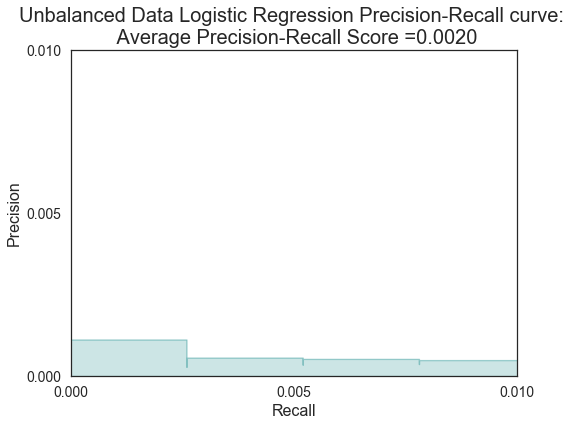

In [272]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

precision, recall, _ = precision_recall_curve(ytrainfull, undersample_y_score)

plt.step(recall, precision, color='teal', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='teal')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.ylim([0.0, 0.01])
plt.xlim([0.0, 0.01])
plt.xticks([0.0, 0.005, 0.01], fontsize=14)
plt.yticks([0.0, 0.005, 0.01], fontsize=14)
plt.title('Unbalanced Data Logistic Regression Precision-Recall curve: \n Average Precision-Recall Score ={0:0.4f}'.format(
          undersample_average_precision), fontsize=20)

In [256]:
undersample_y_score = gbc_best.decision_function(Xtrainfull)

In [270]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(ytrainfull, undersample_y_score)

print('Average precision-recall score: {0:0.4f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.0020


Text(0.5, 1.0, 'Unbalanced Data Gradient Boosted Precision-Recall curve: \n Average Precision-Recall Score =0.0020')

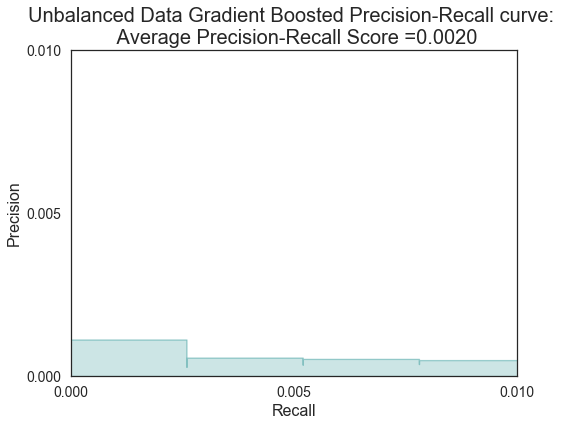

In [271]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

precision, recall, _ = precision_recall_curve(ytrainfull, undersample_y_score)

plt.step(recall, precision, color='teal', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='teal')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.ylim([0.0, 0.01])
plt.xlim([0.0, 0.01])
plt.xticks([0.0, 0.005, 0.01], fontsize=14)
plt.yticks([0.0, 0.005, 0.01], fontsize=14)
plt.title('Unbalanced Data Gradient Boosted Precision-Recall curve: \n Average Precision-Recall Score ={0:0.4f}'.format(
          undersample_average_precision), fontsize=20)

# Isolation Forest on Original Dataset

In [56]:
df.head(3)

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
58146,0,1.452502,-1.316583,0.880687,-1.288393,-1.650246,0.151818,-1.458603,-0.001593,-1.164131,...,-0.264667,-0.195252,-0.079343,-0.432323,0.389680,-0.150356,0.080246,0.032034,-0.177314,-0.980475
223631,0,0.097427,0.947407,-0.857562,-1.231209,1.556145,-1.163677,1.836001,-0.578344,-0.145945,...,0.163702,0.783738,-0.272211,0.507535,-0.296561,0.044713,0.220524,0.048697,-0.322444,1.024429
76194,0,1.175916,0.195894,0.746200,0.668750,-0.754502,-1.281698,0.119175,-0.260972,-0.037866,...,-0.297558,-0.918176,0.242944,0.927768,0.039419,0.064743,-0.037207,0.030415,-0.244921,-0.807905


In [57]:
X = df.drop('Class', axis=1)
y = df['Class']

In [58]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [59]:
#Test train split standard 80 / 20
og_Xtrain, og_Xtest, og_ytrain, og_ytest = train_test_split(X, y, 
                                                    test_size=0.2, random_state=11,stratify=y)

## move this to helper function file

In [298]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def plot_confusion_matrix(cm, title, classes=['anomaly', 'normal'],
                          cmap=ListedColormap(["mintcream", "darkcyan"]), save=False, saveas="MyFigure.png"):
    
    # print Confusion matrix with blue gradient colours
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    plt.figure(figsize = (7,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize= 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                fontsize = 14)

    plt.tight_layout()
    plt.ylabel('True label', fontsize= 16)
    plt.xlabel('Predicted label', fontsize= 16)
    
    if save:
        plt.savefig(saveas, dpi=100)

In [61]:
# Fit and train Isolation Forest on training data
# this is pretty standard parameters
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.05, n_estimators=100, n_jobs=-1)

start = datetime.datetime.now()
clfIF.fit(og_Xtrain,og_ytrain)
y_pred_train = clfIF.predict(og_Xtrain)
end = datetime.datetime.now()
print (end-start)

#fix the target class coing such that classification report works
y_pred_train[y_pred_train==1] = 0
y_pred_train[y_pred_train==-1] = 1

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0:00:30.718791


             precision    recall  f1-score   support

          0       1.00      0.98      0.99    227451
          1       0.07      0.79      0.13       394

avg / total       1.00      0.98      0.99    227845

AUC:  88.7%


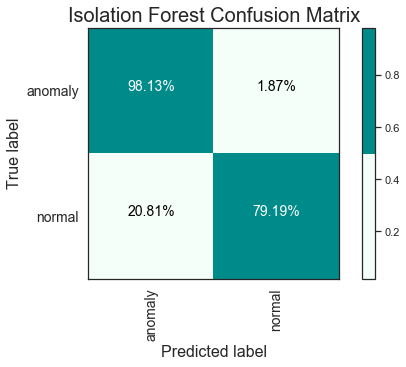

In [299]:

print(classification_report(og_ytrain, y_pred_train))
print ("AUC: ", "{:.1%}".format(roc_auc_score(og_ytrain, y_pred_train)))
cm = confusion_matrix(og_ytrain, y_pred_train)
plot_confusion_matrix(cm, title="Isolation Forest Confusion Matrix", save=False, saveas="IF_Confusion.png")

In [63]:
# this is now with lower contamination rate
clfIF = IsolationForest(max_samples=0.25, random_state=11, contamination=0.02, n_estimators=100, n_jobs=-1)

start = datetime.datetime.now()
clfIF.fit(og_Xtrain,og_ytrain)
y_pred_train = clfIF.predict(og_Xtrain)
end = datetime.datetime.now()
print (end-start)

#fix the target class coing such that classification report works
y_pred_train[y_pred_train==1] = 0
y_pred_train[y_pred_train==-1] = 1

0:00:30.467564


In [152]:
print(classification_report(og_ytrain, y_pred_train))
print ("AUC: ", "{:.1%}".format(roc_auc_score(og_ytrain, y_pred_train)))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99    227451
          1       0.07      0.79      0.13       394

avg / total       1.00      0.98      0.99    227845

AUC:  88.7%


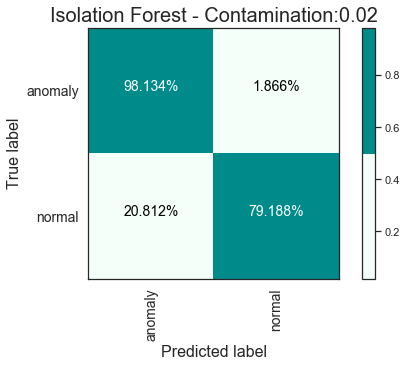

In [199]:

cm = confusion_matrix(og_ytrain, y_pred_train)
plot_confusion_matrix(cm, title="Isolation Forest - Contamination:0.02", save=False, saveas="IF_CM.png")

In [151]:
(unique, counts) = np.unique(y_pred_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies 

array([[     0, 223288],
       [     1,   4557]])

In [67]:
(unique, counts) = np.unique(og_ytrain, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies 

array([[     0, 227451],
       [     1,    394]])

In [68]:
scoring = {'AUC': 'roc_auc', 'Recall': make_scorer(recall_score, pos_label=1)}

In [69]:

## REVIST THIS TO SEE IF IT WORKS at 4:30pm
# gs_con = GridSearchCV(IsolationForest(random_state=11, max_samples=0.10, n_estimators=150, n_jobs=-1),
#                   param_grid={'contamination': np.arange(0.01, 0.25, 0.05)},
#                   scoring=scoring, refit='Recall')
# gs_con.fit(og_Xtrain, og_ytrain)
# results = gs_con.cv_results_

# PCA anomaly analysis -- UNSUPERVISED

### make a scree plot and review compoents and variance explained

In [70]:
from sklearn import (cluster, datasets, decomposition, ensemble, manifold,
                     random_projection, preprocessing)
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [71]:
#import csv data newly so any modifications are not transferred
df = pd.read_csv('creditcard.csv')


In [72]:
#create x and y, maintain in dataframe/ series format for the following
X_pca = df.copy().drop('Class', axis=1)
y_pca = df['Class'].copy()


#use Standard scaler to modify all of the feature columns in X
scaled_X = StandardScaler().fit_transform(X_pca)


In [73]:

pca = decomposition.PCA(n_components=10)
X_pca = pca.fit_transform(scaled_X)

In [74]:
def scree_plot(ax, pca, n_components_to_plot=10, title=None):
 
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
                   (ind[i]+0.2, vals[i]+0.005), 
                   va="bottom", 
                   ha="center", 
                   fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

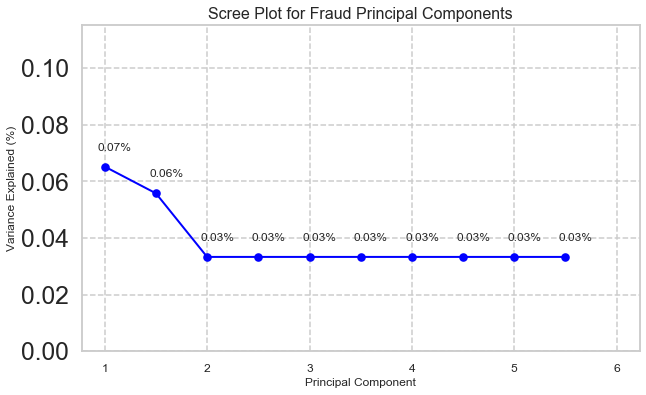

In [75]:
# interesting scree plot -- looks like it levels off after 2 principal components

fig, ax = plt.subplots(figsize=(10, 6))
scree_plot(ax, pca, title="Scree Plot for Fraud Principal Components")

In [76]:
#create x and y, maintain in dataframe/ series format for the following
X_pca = df.copy().drop('Class', axis=1)
y_pca = df['Class'].copy()


# featuresToScale = X_pca.columns
# sX = StandardScaler(copy=True)



# Need to scale the X features that are still in dataframe format
featuresToScale = X_pca.columns

#use Standard scaler to modify all of the feature columns in X
scaled_X = StandardScaler(copy=True)

# replace all of X_pca DataFrame features with the scaled features
# also fit label encoder and return encoded labels
# once you fit_transform to you X feature data -- pca object is ready to plot
X_pca.loc[:,featuresToScale] = scaled_X.fit_transform(X_pca[featuresToScale])

In [77]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_pca, y_pca, test_size=0.2, \
                    random_state=2018, stratify=y_pca)

In [78]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [79]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [80]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))


----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [81]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [82]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])

    plt.step(recall, precision, color='teal', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='teal')

    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.xticks([0.0, 0.5, 1.0], fontsize=12)
    plt.yticks([0.0, 0.5, 1.05], fontsize=12)

    plt.title('Precision-Recall curve: Avg Precision = \
    {0:0.2f}'.format(average_precision), fontsize=16)

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='teal', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks([0.0, 0.5, 1.0], fontsize=12)
    plt.yticks([0.0, 0.5, 1.05], fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC:\
    Area under the curve = {0:0.2f}'.format(areaUnderROC), fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds

In [83]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", 
               palette="YlGnBu",data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName, fontsize=16)
    ax.set_yticklabels(ax.get_yticks(), size = 12)
    ax.set_ylabel(ax.get_ylabel(), size = 14)
    ax.set_xticklabels(ax.get_xticks(), size = 12)
    ax.set_xlabel(ax.get_xlabel(), size = 14)


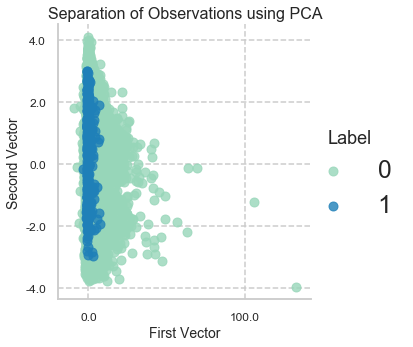

In [84]:
# 30 principal components
from sklearn.decomposition import PCA

n_components = 30
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten,
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

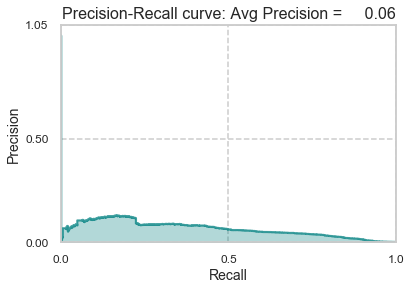

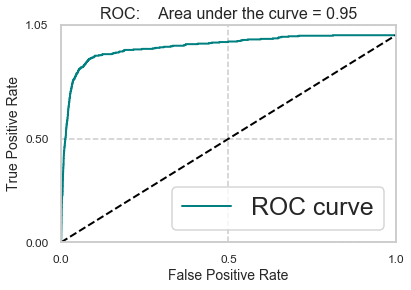

In [85]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

In [86]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 400
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop.
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. 
            anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))
print("Fraud Caught out of 394 Cases:", predsTop.trueLabel.sum())



Precision:  0.12
Recall:  0.12
Fraud Caught out of 394 Cases: 48


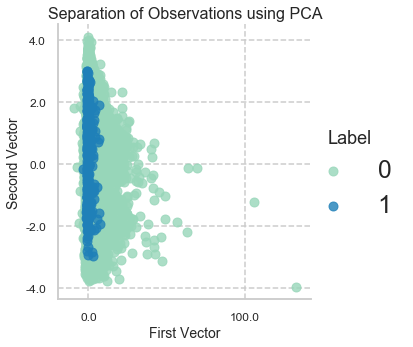

In [87]:
# 27 principal components
from sklearn.decomposition import PCA

n_components = 27
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, 
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse,
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

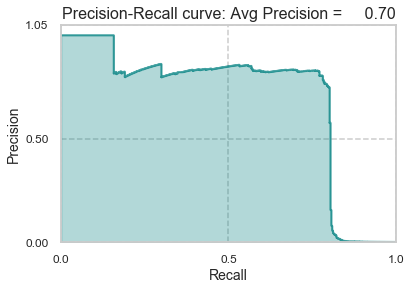

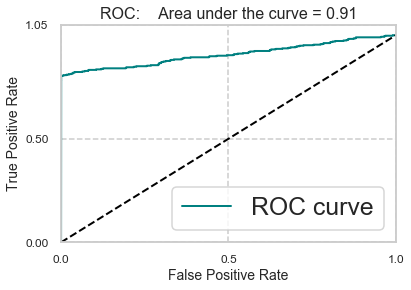

In [88]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

In [89]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 400
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))

Precision:  0.78
Recall:  0.79


## PCA manual confusion matrix


In [90]:
np.array(preds).shape

(227845, 2)

In [91]:
print(type(preds))

<class 'pandas.core.frame.DataFrame'>


+ going to state threshold for anomaly score is 0.02000 and higher is considered a fraud

In [92]:
preds[:10]

,trueLabel,anomalyScore
154684,1,1.000000
151007,1,0.926889
151008,1,0.926889
151006,1,0.926889
151009,1,0.926889
154234,1,0.921859
153823,1,0.887030
153835,1,0.886669
152295,1,0.857126
151462,1,0.855525


In [93]:
preds['predicted_class'] = np.where(preds.anomalyScore>0.02200 , 1, 0)

In [94]:
preds.head(10)

,trueLabel,anomalyScore,predicted_class
154684,1,1.000000,1
151007,1,0.926889,1
151008,1,0.926889,1
151006,1,0.926889,1
151009,1,0.926889,1
154234,1,0.921859,1
153823,1,0.887030,1
153835,1,0.886669,1
152295,1,0.857126,1
151462,1,0.855525,1


In [95]:
(preds > 0).sum()

trueLabel             394
anomalyScore       227844
predicted_class       391
dtype: int64

In [96]:
(preds < 0).sum()

trueLabel          0
anomalyScore       0
predicted_class    0
dtype: int64

In [97]:
matrix = np.array(preds)
matrix

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 9.26889024e-01, 1.00000000e+00],
       [1.00000000e+00, 9.26889024e-01, 1.00000000e+00],
       ...,
       [0.00000000e+00, 3.45981964e-09, 0.00000000e+00],
       [0.00000000e+00, 2.17249284e-09, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [98]:
# function for counts of instance predicted positive and negative asn well as actual positive and negative
matrix = np.array(preds)

def make_input_matrix(arr):
    predict_positive = 0  
    predict_negative = 0 
    actual_positive = 0  
    actual_negative = 0

    for i in arr[:, 2]:
        if i == 1:   
            predict_positive+=1
        else:
            predict_negative +=1
    for i in arr[:, 0]:
        if i == 1:   
            actual_positive+=1
        else:
            actual_negative +=1

    return predict_positive, predict_negative, actual_positive, actual_negative

In [99]:
make_input_matrix(matrix)

(391, 227454, 394, 227451)

In [100]:
item = make_input_matrix(matrix)
item

(391, 227454, 394, 227451)

In [101]:
#function for making confusion matrix in LOGICAL format

def make_conf_matrix(item):   
    true_positive = 0
    true_negative = 0

    false_negative = 0
    false_positive = 0
    
    predict_positive = item[0]
    predict_negative = item[1]
    actual_positive = item[2]
    actual_negative = item[3]
    
    
    num = actual_positive - predict_positive
    num2 = actual_negative - predict_negative

    if actual_positive - predict_positive > 1:

        false_negative += num
    else:
        false_positive -= num

    if actual_positive > predict_positive:
        true_positive += predict_positive
    else:
        true_positive += actual_positive

    if actual_negative > predict_negative:
        true_negative += predict_negative
    else:
        true_negative += actual_negative
    return true_positive, false_negative, false_positive, true_negative 


In [102]:
make_conf_matrix(item)

(391, 3, 0, 227451)

In [103]:
conf_matrix = make_conf_matrix(make_input_matrix(matrix))
array_conf_matrix = np.asarray(conf_matrix)
array_conf_matrix

array([   391,      3,      0, 227451])

In [104]:
y_hat_matrix = np.array(preds)[:, 2]
y_hat_matrix

array([1., 1., 1., ..., 0., 0., 0.])

In [105]:
y_og_matrix = np.array(preds)[:, 0]
y_og_matrix

array([1., 1., 1., ..., 0., 0., 0.])

In [106]:
y_og_matrix.sum()

394.0

In [107]:
y_hat_matrix.sum()

391.0

In [108]:
y_og_matrix.shape

(227845,)

In [109]:

print(classification_report(y_og_matrix, y_hat_matrix))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_og_matrix, y_hat_matrix)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    227451
        1.0       0.79      0.78      0.78       394

avg / total       1.00      1.00      1.00    227845

AUC:  89.1%


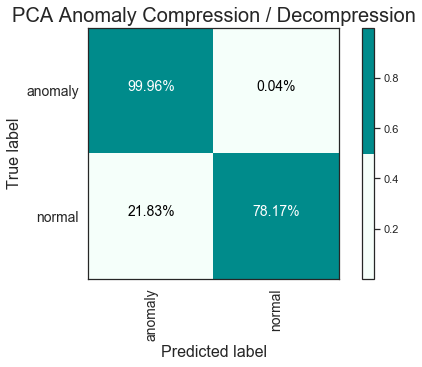

In [301]:
#CONFUSION MATRIX FOR PCA ANALYSIS
import seaborn as sns


cm = confusion_matrix(y_og_matrix, y_hat_matrix)
plot_confusion_matrix(cm, title="PCA Anomaly Compression / Decompression", save=False, saveas="PCA_Confusion.png")

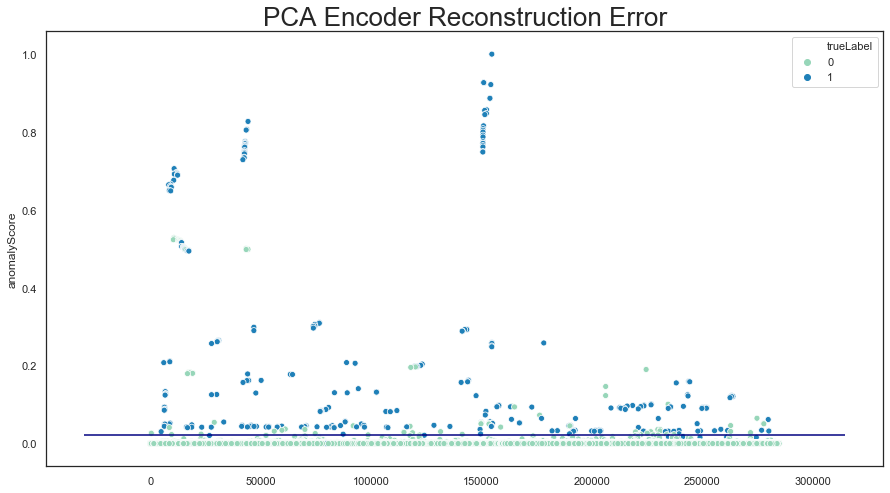

In [249]:
import seaborn as sns
threshold = 0.02200
sns.set(style="white")

plt.figure(figsize=(15,8))
g = sns.scatterplot(x = preds.index, y = preds['anomalyScore'],
                    hue = preds['trueLabel'], palette='YlGnBu')
g.set_title('PCA Encoder Reconstruction Error', fontsize=26)
g.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="navy", zorder=100, label='Threshold');

# NN Auto-encoder

In [111]:
from functools import reduce
from operator import mul
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Flatten, Conv2D, MaxPooling2D, Dropout, Reshape, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax, Ftrl, Nadam, Optimizer, Adadelta, Adagrad, RMSprop, SGD



from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(57)

In [112]:
#import csv data newly so any modifications are not transferred
df = pd.read_csv('creditcard.csv')

In [113]:
#create x and y, maintain in dataframe/ series format for the following
X_nn = df.copy().drop('Class', axis=1)
y_nn = df['Class'].copy()

# Need to scale the X features that are still in dataframe format
featuresToScale = X_nn.columns

#use Standard scaler to modify all of the feature columns in X
scaled_X_nn = StandardScaler(copy=True)

# replace all of X_pca DataFrame features with the scaled features
# also fit label encoder and return encoded labels
# once you fit_transform to you X feature data 
X_nn.loc[:,featuresToScale] = scaled_X_nn.fit_transform(X_nn[featuresToScale])

In [114]:
def dense_encoder(shape, neurons, dim):
    i = Input(shape=shape)
    x = Flatten()(i)
    x = Dense(units=neurons)(x)
    x = LeakyReLU()(x)
    x = Dense(units=dim)(x)
    x = LeakyReLU()(x)
    return Model(i, x, name='Dense-Encocder')

In [115]:
def dense_decoder(shape, neurons, dim):
    flattened = reduce(mul, shape)
    i = Input(shape=dim)
    x = Dense(units=neurons)(i)
    x = LeakyReLU()(x)
    x = Dense(units=flattened)(x)
    x = LeakyReLU()(x)
    x = Reshape(shape)(x)
    return Model(i, x, name='Dense-Decoder')

In [116]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [117]:
X_nn.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [118]:
Xnn_train, Xnn_test, ynn_train, ynn_test = train_test_split(X_nn, y_nn, test_size=0.2,
                    random_state=42, stratify=y_nn)

In [119]:
Xnn_train.shape, ynn_train.shape

((227845, 30), (227845,))

In [120]:
# dimension reduction
dim = 27

In [121]:
Xnn_train.shape[1:]

(30,)

In [122]:
# ENCODER
encoder = dense_encoder(Xnn_train.shape[1:], 300, dim)
encoder.summary()

Model: "Dense-Encocder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
flatten (Flatten)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 300)               9300      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 27)                8127      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 27)                0         
Total params: 17,427
Trainable params: 17,427
Non-trainable params: 0
________________________________________________

In [123]:

# DECODER
decoder = dense_decoder(Xnn_train.shape[1:], 300, dim)
decoder.summary()

Model: "Dense-Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               8400      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                9030      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 30)                0         
_________________________________________________________________
reshape (Reshape)            (None, 30)                0         
Total params: 17,430
Trainable params: 17,430
Non-trainable params: 0
_________________________________________________

In [124]:

# AUTOENCODER
inp = Input(shape=Xnn_train.shape[1:])
mid = encoder(inp)
out = decoder(mid)

model = Model(inp, out, name="Dense-AutoEncoder")
model.summary()

Model: "Dense-AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
Dense-Encocder (Model)       (None, 27)                17427     
_________________________________________________________________
Dense-Decoder (Model)        (None, 30)                17430     
Total params: 34,857
Trainable params: 34,857
Non-trainable params: 0
_________________________________________________________________


In [125]:

# TRAINING
model.compile(loss="mse", optimizer=Adam(lr=0.005))
model.fit(Xnn_train, Xnn_train, epochs=20, batch_size=400, shuffle=True, validation_data=(Xnn_test, Xnn_test), verbose=1)

Train on 227845 samples, validate on 56962 samples
Epoch 1/20
227845/227845 [==============================] - 2s 11us/sample - loss: 0.1122 - val_loss: 0.0463
Epoch 2/20
227845/227845 [==============================] - 2s 9us/sample - loss: 0.0478 - val_loss: 0.0344
Epoch 3/20
227845/227845 [==============================] - 2s 9us/sample - loss: 0.0309 - val_loss: 0.0259
Epoch 4/20
227845/227845 [==============================] - 2s 9us/sample - loss: 0.0310 - val_loss: 0.0229
Epoch 5/20
227845/227845 [==============================] - 2s 9us/sample - loss: 0.0240 - val_loss: 0.0628
Epoch 6/20
227845/227845 [==============================] - 2s 9us/sample - loss: 0.0329 - val_loss: 0.0161
Epoch 7/20
227845/227845 [==============================] - 2s 9us/sample - loss: 0.0212 - val_loss: 0.0120
Epoch 8/20
227845/227845 [==============================] - 2s 9us/sample - loss: 0.0132 - val_loss: 0.0106
Epoch 9/20
227845/227845 [==============================] - 2s 9us/sample - loss: 0.

In [126]:

# PREDICTIONS
Xnn_hat = model.predict(Xnn_train)

In [127]:
Xnn_hat.shape, Xnn_train.shape

((227845, 30), (227845, 30))

## Analyze results of NN encoding

In [128]:
ynn_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [129]:
X_train_NN = Xnn_train
X_train_NN = pd.DataFrame(data=X_train_NN, index=Xnn_train.index)

X_hat_NN = Xnn_hat
X_hat_NN = pd.DataFrame(data=X_hat_NN, index=Xnn_train.index)

In [130]:
X_train_NN.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.413095,0.993901,-0.455716,-0.893736,-0.467297,1.088809,3.021112,-1.196081,0.954393,1.280521,...,-0.174381,0.103736,0.409999,0.493090,1.140898,-0.672034,-0.806483,0.192356,-0.097696,-0.323963
180305,0.624644,1.039035,-0.029601,-2.017272,0.175119,2.132584,2.476000,-0.001772,0.564978,0.041712,...,-0.294814,0.052590,0.314451,0.056917,1.167497,0.983900,-0.977130,0.006243,-0.209044,-0.341275
42664,-1.129186,-0.506419,0.365282,0.469563,-0.700931,-0.598327,1.468368,-1.788553,-4.217792,0.000702,...,1.661457,-3.809756,0.150924,-0.699053,-1.540179,1.585882,1.894906,0.094266,0.561497,0.346835
198723,0.796203,1.166961,-0.908517,-0.493035,-1.178161,-1.010069,-0.262964,-1.154307,0.008381,-1.018038,...,-0.636433,-0.190151,0.106123,0.333585,-0.888698,-0.533367,-0.336083,0.044707,-0.190877,-0.328841
82325,-0.746606,-0.229105,-0.612509,0.076440,-2.440100,0.518582,-0.110706,0.407688,-0.095296,-0.040762,...,-0.357100,-0.331161,-0.238802,-0.010717,-2.249471,-0.560612,-0.299904,-0.080718,-0.194477,-0.008994


In [131]:
X_hat_NN.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
265518,1.509919,0.963651,-0.457522,-0.851601,-0.405541,1.138914,3.143878,-1.218477,0.930613,1.331390,...,-0.247967,0.156659,0.345277,0.521521,1.166367,-0.661512,-0.828175,0.329051,-0.036265,-0.276603
180305,0.714643,0.938288,-0.038095,-2.013587,0.141331,2.168514,2.381474,-0.083354,0.563727,0.115797,...,-0.309386,-0.026930,0.303342,0.031284,1.102642,1.016904,-1.011014,0.018291,-0.157161,-0.157114
42664,-1.161556,-0.651703,-0.007781,0.434557,-0.594056,-0.658999,1.602082,-1.416581,-4.358133,-0.097631,...,1.658446,-3.674073,0.283040,-0.673444,-1.350669,1.550732,1.745679,-0.061833,0.642091,0.270835
198723,0.958869,1.065125,-0.926710,-0.466278,-1.148552,-1.042363,-0.253840,-1.175960,-0.012395,-1.020195,...,-0.569335,-0.206586,0.002434,0.342834,-0.858299,-0.466698,-0.330714,-0.018610,-0.135363,-0.184208
82325,-0.753280,-0.276393,-0.512238,0.044652,-2.429263,0.307428,-0.082388,0.503673,-0.071733,-0.027862,...,-0.441906,-0.321052,-0.205958,-0.017647,-2.300107,-0.566351,-0.316198,-0.047535,-0.121805,-0.042452


In [132]:
def anomalyScoresNN(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [133]:
anomalyScoresNN = anomalyScores(Xnn_train, X_hat_NN)
anomalyScoresNN = pd.DataFrame(data=anomalyScoresNN, index=Xnn_train.index)

anomalyScoresNN 

,0
265518,0.000074
180305,0.000076
42664,0.000434
198723,0.000072
82325,0.000097
...,...
233802,0.000036
85418,0.000186
29062,0.000019
13766,0.000048


In [134]:
preds_NN = pd.concat([ynn_train, anomalyScoresNN], axis=1)
preds_NN.columns = ['trueLabel', 'anomalyScoreNN']
preds_NN.trueLabel.value_counts()


0    227451
1       394
Name: trueLabel, dtype: int64

In [135]:
preds_NN.sort_values(by="anomalyScoreNN",ascending=False,inplace=True)
preds_NN[:50]

,trueLabel,anomalyScoreNN
274771,0,1.000000
226690,0,0.217090
39769,0,0.204480
23128,0,0.170224
74699,0,0.129513
154684,1,0.121295
224569,0,0.120735
154587,1,0.111448
175710,0,0.110299
220212,0,0.109159


In [288]:
preds_NN['predicted_class'] = np.where(preds_NN.anomalyScoreNN>0.0105, 1, 0)
preds_NN[:50]

,trueLabel,anomalyScoreNN,predicted_class
274771,0,1.000000,1
226690,0,0.217090,1
39769,0,0.204480,1
23128,0,0.170224,1
74699,0,0.129513,1
154684,1,0.121295,1
224569,0,0.120735,1
154587,1,0.111448,1
175710,0,0.110299,1
220212,0,0.109159,1


In [289]:
(preds_NN > 0).sum()

trueLabel             394
anomalyScoreNN     227844
predicted_class       397
dtype: int64

In [290]:
(preds_NN < 0).sum()

trueLabel          0
anomalyScoreNN     0
predicted_class    0
dtype: int64

In [291]:
matrix_NN = np.array(preds_NN)
matrix_NN

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 2.17090466e-01, 1.00000000e+00],
       [0.00000000e+00, 2.04480271e-01, 1.00000000e+00],
       ...,
       [0.00000000e+00, 9.74595508e-07, 0.00000000e+00],
       [0.00000000e+00, 7.78523959e-07, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [292]:
item_NN = make_input_matrix(matrix_NN)
item_NN

(397, 227448, 394, 227451)

In [293]:
conf_matrix_NN = make_conf_matrix(make_input_matrix(matrix_NN))
array_conf_matrix_NN = np.asarray(conf_matrix_NN)
array_conf_matrix_NN

array([   394,      0,      3, 227448])

In [294]:
ynn_hat_matrix = np.array(preds_NN)[:, 2]
ynn_hat_matrix

array([1., 1., 1., ..., 0., 0., 0.])

In [295]:
ynn_og_matrix = np.array(preds)[:, 0]
ynn_og_matrix

array([1., 1., 1., ..., 0., 0., 0.])

In [296]:
print(classification_report(ynn_og_matrix, ynn_hat_matrix))
print ("AUC: ", "{:.1%}".format(roc_auc_score(ynn_og_matrix, ynn_hat_matrix)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    227451
        1.0       0.78      0.78      0.78       394

avg / total       1.00      1.00      1.00    227845

AUC:  89.2%


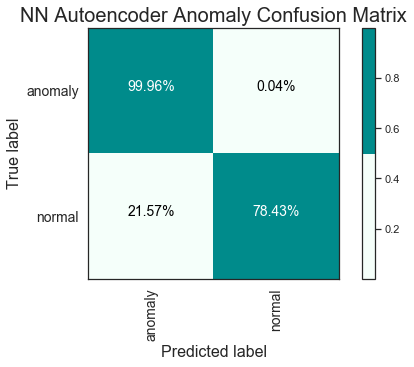

In [302]:
#CONFUSION MATRIX FOR NN Autoencoder
import seaborn as sns


cm = confusion_matrix(ynn_og_matrix, ynn_hat_matrix)
plot_confusion_matrix(cm, title="NN Autoencoder Anomaly Confusion Matrix", save=False, saveas="NN_Confusion.png")

In [195]:
preds_NN.head()

,trueLabel,anomalyScoreNN,predicted_class
274771,0,1.000000,1
226690,0,0.217090,1
39769,0,0.204480,1
23128,0,0.170224,1
74699,0,0.129513,1


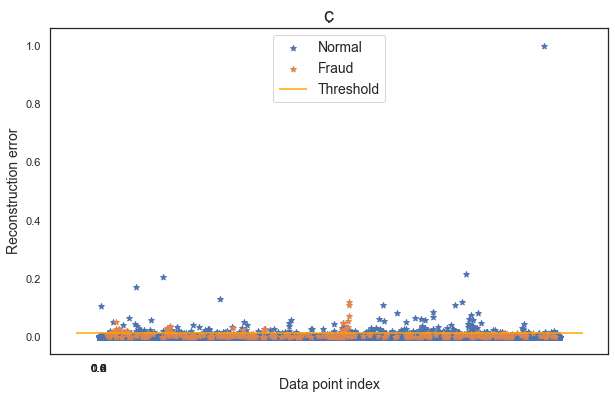

In [196]:
# plot the testing set with the threshold
threshold = 0.0135
groups = preds_NN.groupby('trueLabel')
colors = ['teal', 'navy']
fig, ax = plt.subplots(figsize=(10,6))
for name, group in groups:
    ax.scatter(group.index, group.anomalyScoreNN, marker='*',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="orange", zorder=100, label='Threshold')
ax.legend(loc='upper center', fontsize=14)
plt.title("ç", fontsize=20)
plt.ylabel("Reconstruction error", fontsize=14)
plt.xlabel("Data point index", fontsize=14)
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12)

plt.show();

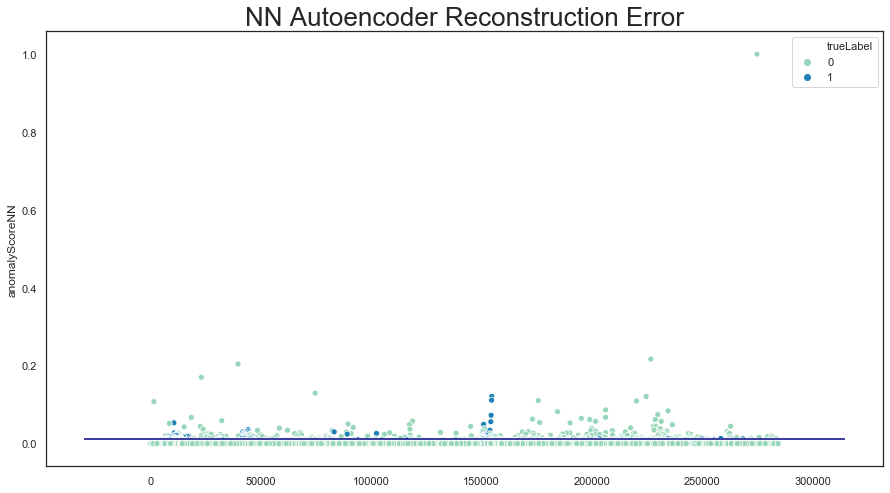

In [250]:
import seaborn as sns
threshold = 0.0105
sns.set(style="white")

plt.figure(figsize=(15,8))
g = sns.scatterplot(x = preds_NN.index, y = preds_NN['anomalyScoreNN'],
                    hue = preds_NN['trueLabel'], palette='YlGnBu')
g.set_title('NN Autoencoder Reconstruction Error', fontsize=26)
g.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="navy", zorder=100, label='Threshold');


/Users/jessicapmouras/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


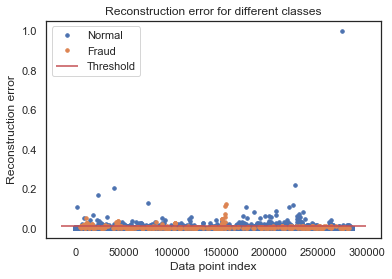

In [198]:
# plot the testing set with the threshold
threshold = 0.0105
groups = preds_NN.groupby('trueLabel')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.anomalyScoreNN, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();
